In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
dataset = pd.read_csv('BinaryRFSS2015.csv')

In [34]:
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [37]:
# Convert 'Diabetes_012' column from float to integer
dataset['Diabetes_012'] =dataset['Diabetes_012'].astype(int)


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int32  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [39]:
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [40]:
dataset = dataset.rename(columns = {'Diabetes_012':'Diabetes_binary'})

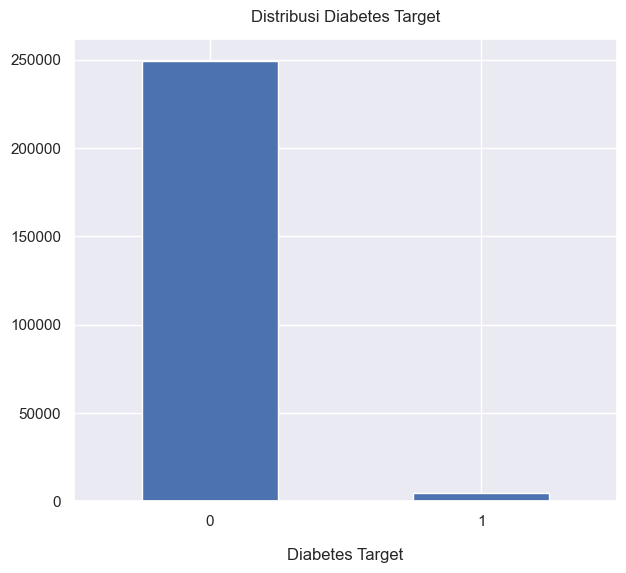

0    249049
1      4631
Name: Diabetes_binary, dtype: int64


In [41]:
sns.set(font_scale=1.0)
dataset['Diabetes_binary'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Target", labelpad=14)
plt.title("Distribusi Diabetes Target", y=1.02);
plt.show()

print(dataset['Diabetes_binary'].value_counts())

In [42]:
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
44,0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
52,0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [43]:
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [45]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228245 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       228245 non-null  int32  
 1   HighBP                228245 non-null  float64
 2   HighChol              228245 non-null  float64
 3   CholCheck             228245 non-null  float64
 4   BMI                   228245 non-null  float64
 5   Smoker                228245 non-null  float64
 6   Stroke                228245 non-null  float64
 7   HeartDiseaseorAttack  228245 non-null  float64
 8   PhysActivity          228245 non-null  float64
 9   Fruits                228245 non-null  float64
 10  Veggies               228245 non-null  float64
 11  HvyAlcoholConsump     228245 non-null  float64
 12  AnyHealthcare         228245 non-null  float64
 13  NoDocbcCost           228245 non-null  float64
 14  GenHlth               228245 non-null  float64
 15  

In [46]:
X = dataClean.drop(['Diabetes_binary'], axis = 1).values
y = dataClean['Diabetes_binary']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
import numpy as np

# Find unique values and their counts in y_train
unique_classes, counts = np.unique(y_train, return_counts=True)

# Find the index of the class with the highest count (majority class)
majority_index = np.argmax(counts)
majority_class = unique_classes[majority_index]
majority_count = counts[majority_index]

# Find the index of the class with the lowest count (minority class)
minority_index = np.argmin(counts)
minority_class = unique_classes[minority_index]
minority_count = counts[minority_index]

# Print the majority and minority class information
print("Majority class:", majority_class)
print("Count:", majority_count)
print("Minority class:", minority_class)
print("Count:", minority_count)



Majority class: 0
Count: 178893
Minority class: 1
Count: 3703


In [51]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
unique_classes_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for cls, count in zip(unique_classes_resampled, counts_resampled):
    print(f"Class {cls}: {count} samples")


Class distribution after SMOTE:
Class 0: 178893 samples
Class 1: 178893 samples


In [54]:
'''from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with a desired sampling strategy
sampling_strategy = {0: 178893, 1:  178893} 
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE to the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
unique_classes_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for cls, count in zip(unique_classes_resampled, counts_resampled):
    print(f"Class {cls}: {count} samples")'''


Class distribution after SMOTE:
Class 0: 178893 samples
Class 1: 178893 samples


In [55]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with sampling_strategy='auto' to balance both classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
unique_classes_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for cls, count in zip(unique_classes_resampled, counts_resampled):
    print(f"Class {cls}: {count} samples")


Class distribution after SMOTE:
Class 0: 178893 samples
Class 1: 178893 samples


In [64]:
import numpy as np

# Convert SMOTE-resampled arrays back to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled)
# Example custom column names
custom_column_names = ['Diabetes_binary','HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth' , 'DiffWalk', 'Sex', 'Age', 'Education','Income'  ]

# Create DataFrame with custom column names
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=custom_column_names)

#X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

# Convert original majority data to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_resampled_df.columns)

# Stack the majority data with the SMOTE-resampled data horizontally
X_train_merged = np.vstack((X_train_df, X_train_resampled_df))
y_train_merged = pd.concat([y_train, y_train_resampled_df], axis=0)

# Check the shape of the merged data
print("Shape of merged X_train:", X_train_merged.shape)
print("Shape of merged y_train:", y_train_merged.shape)



Shape of merged X_train: (540382, 21)
Shape of merged y_train: (540382,)


In [66]:
import xgboost as xgb

# Define XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)


In [67]:
from sklearn.ensemble import AdaBoostClassifier

# Define AdaBoost model
adaboost_model = AdaBoostClassifier()

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on test data
y_pred_adaboost = adaboost_model.predict(X_test)


In [68]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize input text
inputs = tokenizer(X_train, padding=True, truncation=True, return_tensors="pt")

# Train the model
optimizer = AdamW(model.parameters(), lr=5e-5)
labels = torch.tensor(y_train)
outputs = model(**inputs, labels=labels)
loss = outputs.loss
loss.backward()
optimizer.step()

# Predict on test data
inputs_test = tokenizer(X_test, padding=True, truncation=True, return_tensors="pt")
outputs_test = model(**inputs_test)
y_pred_bert = torch.argmax(outputs_test.logits, dim=1).numpy()


ModuleNotFoundError: No module named 'transformers'

In [69]:
# Predict on test data using XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost model:", accuracy_xgb)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy of XGBoost model: 0.9796928738855177
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44723
           1       0.00      0.00      0.00       926

    accuracy                           0.98     45649
   macro avg       0.49      0.50      0.49     45649
weighted avg       0.96      0.98      0.97     45649



In [70]:
# Predict on test data using AdaBoost model
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy of AdaBoost model:", accuracy_adaboost)

print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


Accuracy of AdaBoost model: 0.9797147801704309
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44723
           1       0.00      0.00      0.00       926

    accuracy                           0.98     45649
   macro avg       0.49      0.50      0.49     45649
weighted avg       0.96      0.98      0.97     45649



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost model:", accuracy_xgb)

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Evaluate AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("\nAccuracy of AdaBoost model:", accuracy_adaboost)

print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))


Accuracy of XGBoost model: 0.9796928738855177
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44723
           1       0.00      0.00      0.00       926

    accuracy                           0.98     45649
   macro avg       0.49      0.50      0.49     45649
weighted avg       0.96      0.98      0.97     45649


Accuracy of AdaBoost model: 0.9797147801704309
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44723
           1       0.00      0.00      0.00       926

    accuracy                           0.98     45649
   macro avg       0.49      0.50      0.49     45649
weighted avg       0.96      0.98      0.97     45649



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
!pip install tabulate



In [75]:
from tabulate import tabulate

# Create a list of model names, accuracy scores, and classification reports
model_names = ['XGBoost', 'AdaBoost']
accuracies = [accuracy_xgb, accuracy_adaboost]
reports = [classification_report(y_test, y_pred_xgb), classification_report(y_test, y_pred_adaboost)]

# Create a table
table_data = zip(model_names, accuracies, reports)
headers = ["Model", "Accuracy", "Classification Report"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+----------+------------+-------------------------------------------------------+
| Model    |   Accuracy | Classification Report                                 |
+==========+============+=======================================================+
| XGBoost  |   0.979693 | precision    recall  f1-score   support               |
|          |            |                                                       |
|          |            |            0       0.98      1.00      0.99     44723 |
|          |            |            1       0.00      0.00      0.00       926 |
|          |            |                                                       |
|          |            |     accuracy                           0.98     45649 |
|          |            |    macro avg       0.49      0.50      0.49     45649 |
|          |            | weighted avg       0.96      0.98      0.97     45649 |
+----------+------------+-------------------------------------------------------+
| AdaBoost |   0

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
